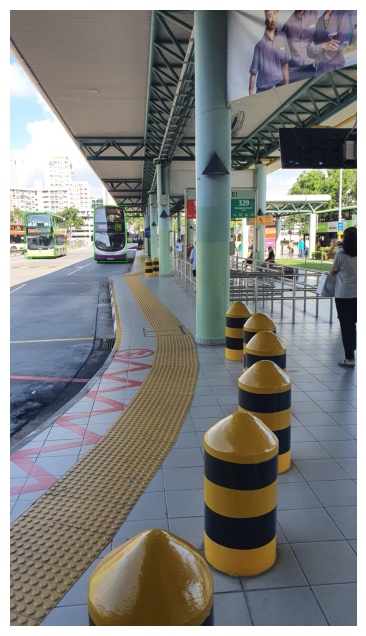

In [3]:
import cv2
from matplotlib import pyplot as plt

def visualize_yolo_boxes_jupyter(img_path, txt_path):
    # Load image
    img = cv2.imread(img_path)
    # rotate -90 degrees
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    if img is None:
        raise ValueError(f"Failed to load image: {img_path}")
    img_height, img_width = img.shape[:2]

    # Read YOLO annotations from the .txt file
    with open(txt_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue  # Skip malformed lines

        cls_id, x_c, y_c, w, h = map(float, parts)
        x1 = int((x_c - w / 2) * img_width)
        y1 = int((y_c - h / 2) * img_height)
        x2 = int((x_c + w / 2) * img_width)
        y2 = int((y_c + h / 2) * img_height)

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, str(int(cls_id)), (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36, 255, 12), 1)

    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Example usage:
visualize_yolo_boxes_jupyter("SBS Bus Numbers.v1i.yolov11/train/images/20220423_091820_jpg.rf.966c39372269eb77e9dfc2ccaabb2a3f.jpg", "SBS Bus Numbers.v1i.yolov11/train/labels/20220423_091820_jpg.rf.966c39372269eb77e9dfc2ccaabb2a3f.txt")



--- Example 1: Using a dummy image (will not show 'correction' unless it has EXIF) ---
Processing and displaying: SBS Bus Numbers.v1i.yolov11/train/images/20220423_091820_jpg.rf.966c39372269eb77e9dfc2ccaabb2a3f.jpg


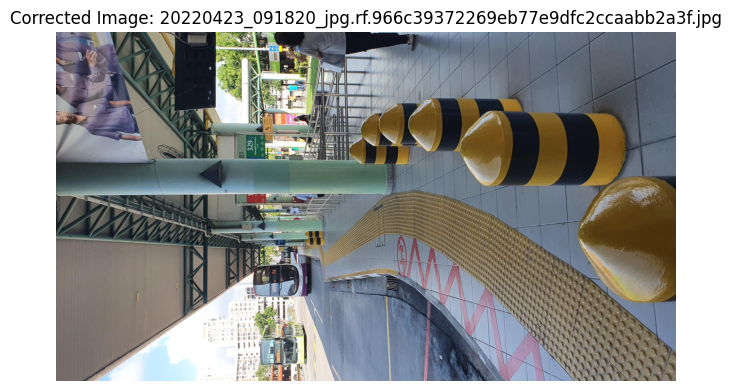


Script finished.


In [4]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os

def display_corrected_image_with_matplotlib(image_path):
    """
    Corrects the orientation of an image based on its EXIF data (if any)
    and displays it using Matplotlib.

    Args:
        image_path (str): The full path to the image file.
    """
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return

    try:
        # Open the image using Pillow
        img = Image.open(image_path)

        # Apply EXIF orientation correction
        # This function rotates/flips the image data based on EXIF and removes the tag.
        corrected_img = ImageOps.exif_transpose(img)

        print(f"Processing and displaying: {image_path}")

        # Display the corrected image using Matplotlib
        plt.figure(figsize=(8, 8)) # Optional: set figure size
        plt.imshow(corrected_img)
        plt.title(f"Corrected Image: {os.path.basename(image_path)}")
        plt.axis('off') # Hide axes
        plt.show()

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")

# --- Example Usage ---
if __name__ == "__main__":
    # Create a dummy image file for demonstration if it doesn't exist.
    # In a real scenario, you would replace this with your actual image path.
    dummy_image_path = "SBS Bus Numbers.v1i.yolov11/train/images/20220423_091820_jpg.rf.966c39372269eb77e9dfc2ccaabb2a3f.jpg"


    if dummy_image_path and os.path.exists(dummy_image_path):
        print("\n--- Example 1: Using a dummy image (will not show 'correction' unless it has EXIF) ---")
        display_corrected_image_with_matplotlib(dummy_image_path)

    # Replace this with the actual path to one of your problematic images
    # Example:
    # your_actual_image_path = "path/to/your_dataset/train/images/mobile_flipped_image.jpg"
    # print("\n--- Example 2: Using an actual image from your dataset (uncomment to run) ---")
    # display_corrected_image_with_matplotlib(your_actual_image_path)

    print("\nScript finished.")

Processing image: 20220423_091820_jpg.rf.966c39372269eb77e9dfc2ccaabb2a3f.jpg
  No EXIF orientation detected or applied. Checking heuristic...
  No heuristic correction applied.


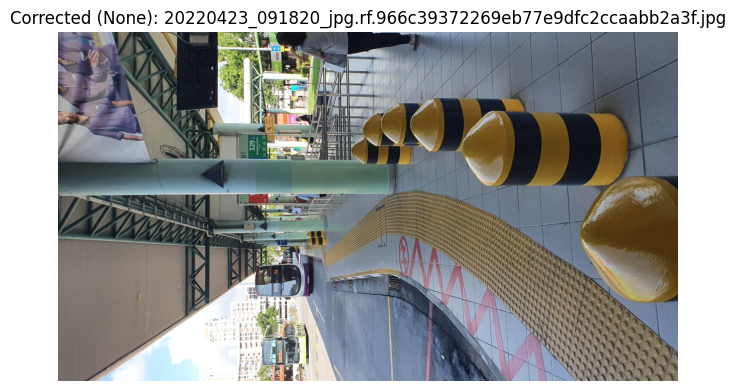

In [5]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os

def correct_and_display_image_orientation(image_path: str,
                                          save_corrected_image: bool = False,
                                          expected_portrait_res_range: tuple = None,
                                          expected_landscape_res_range: tuple = None):
    """
    Attempts to correct image orientation using EXIF data. If no EXIF correction occurs,
    it falls back to a heuristic based on expected aspect ratios/resolutions,
    then displays the image using Matplotlib.

    Args:
        image_path (str): The full path to the image file.
        save_corrected_image (bool): If True, overwrites the original image with the
                                     corrected version. USE WITH EXTREME CAUTION AND
                                     BACKUP YOUR DATA FIRST!
        expected_portrait_res_range (tuple, optional): A tuple of (min_width, max_width, min_height, max_height)
                                                       for images *expected* to be portrait (e.g., phone photos).
                                                       If an image within this range is currently landscape, it's rotated.
                                                       Example: (1000, 1200, 1800, 2000) for 1080x1920 images.
        expected_landscape_res_range (tuple, optional): A tuple of (min_width, max_width, min_height, max_height)
                                                        for images *expected* to be landscape.
                                                        If an image within this range is currently portrait, it's rotated.
                                                        Example: (1800, 2000, 1000, 1200) for 1920x1080 images.
    """
    if not os.path.exists(image_path):
        print(f"Error: Image not found at: {image_path}")
        return

    print(f"Processing image: {os.path.basename(image_path)}")
    img_original_dims = None
    applied_correction_type = "None"

    try:
        # Step 1: Attempt EXIF orientation correction
        img = Image.open(image_path)
        img_original_dims = img.size # Store dimensions before EXIF transpose

        # ImageOps.exif_transpose() handles orientation and removes the EXIF tag
        corrected_img = ImageOps.exif_transpose(img)

        # Check if EXIF transpose actually performed a rotation (dimensions swapped)
        exif_rotated = (img_original_dims[0] != corrected_img.width or img_original_dims[1] != corrected_img.height)

        if exif_rotated:
            applied_correction_type = "EXIF"
            print("  EXIF orientation successfully applied.")
        else:
            print("  No EXIF orientation detected or applied. Checking heuristic...")

            # Step 2: Heuristic-based correction (fallback if EXIF didn't rotate)
            current_width, current_height = corrected_img.size
            
            # Heuristic for portrait images that are currently landscape
            if expected_portrait_res_range:
                min_w, max_w, min_h, max_h = expected_portrait_res_range
                # If image is currently landscape AND its dimensions (swapped) fit the expected portrait range
                if current_width > current_height and \
                   min_w <= current_height <= max_w and \
                   min_h <= current_width <= max_h:
                    print(f"  Heuristic: Detected {current_width}x{current_height} image as potential portrait flipped to landscape. Rotating 90 deg counter-clockwise.")
                    corrected_img = corrected_img.rotate(90, expand=True)
                    applied_correction_type = "Heuristic (Portrait Flip)"
            
            # Heuristic for landscape images that are currently portrait
            if applied_correction_type == "None" and expected_landscape_res_range:
                min_w, max_w, min_h, max_h = expected_landscape_res_range
                # If image is currently portrait AND its dimensions (swapped) fit the expected landscape range
                if current_height > current_width and \
                   min_w <= current_height <= max_w and \
                   min_h <= current_width <= max_h:
                    print(f"  Heuristic: Detected {current_width}x{current_height} image as potential landscape flipped to portrait. Rotating 90 deg counter-clockwise.")
                    corrected_img = corrected_img.rotate(90, expand=True)
                    applied_correction_type = "Heuristic (Landscape Flip)"
            
            if applied_correction_type == "None":
                print("  No heuristic correction applied.")

        # Step 3: Display the (potentially) corrected image
        plt.figure(figsize=(8, 8))
        plt.imshow(corrected_img)
        plt.title(f"Corrected ({applied_correction_type}): {os.path.basename(image_path)}")
        plt.axis('off')
        plt.show()

        # Step 4: Optionally save the corrected image
        if save_corrected_image and applied_correction_type != "None":
            try:
                corrected_img.save(image_path)
                print(f"  Corrected image saved to: {image_path}")
            except Exception as e:
                print(f"  Error saving corrected image {image_path}: {e}")
        elif save_corrected_image and applied_correction_type == "None":
            print("  No correction applied, so image not saved (unless it was already correct).")

    except Exception as e:
        print(f"An error occurred while processing {image_path}: {e}")

correct_and_display_image_orientation("SBS Bus Numbers.v1i.yolov11/train/images/20220423_091820_jpg.rf.966c39372269eb77e9dfc2ccaabb2a3f.jpg")

In [6]:
image_path = "SBS Bus Numbers.v1i.yolov11/train/images/20220423_091820_jpg.rf.966c39372269eb77e9dfc2ccaabb2a3f.jpg"

if os.path.exists(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        print(f"Image dimensions: {width}x{height}")
else:
    print("Image not found. Please verify the path.")

Image dimensions: 4032x2268


In [8]:
image_path = "SBS Bus Numbers.v1i.yolov11/train/images/20220423_091945_jpg.rf.dffadd72521f4f697f022e99723f3c7e.jpg"

if os.path.exists(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        print(f"Image dimensions: {width}x{height}")
else:
    print("Image not found. Please verify the path.")

Image dimensions: 4032x2268


In [8]:
from ultralytics import YOLO

model = YOLO("models/busDetector_Distilled.pt")
 
results = model.predict("data/taku-3grva_bus-detextion_dataset/images/valid", save_crop=True, save=True)



image 1/17 /Users/sriramjeyakumar/Code/SCVU-Training/data/taku-3grva_bus-detextion_dataset/images/valid/151-14-_jpeg.rf.94f5c34c5e891cbb9fabaf7c1e4b5324.jpg: 640x640 1 bus, 73.5ms
image 2/17 /Users/sriramjeyakumar/Code/SCVU-Training/data/taku-3grva_bus-detextion_dataset/images/valid/151-19-_jpeg.rf.366794afdc76401319ed306bedc9080b.jpg: 640x640 2 buss, 69.5ms
image 3/17 /Users/sriramjeyakumar/Code/SCVU-Training/data/taku-3grva_bus-detextion_dataset/images/valid/151-2-_jpeg.rf.298f52a7df8866230331b9cc5ea6ee4a.jpg: 640x640 (no detections), 68.2ms
image 4/17 /Users/sriramjeyakumar/Code/SCVU-Training/data/taku-3grva_bus-detextion_dataset/images/valid/151-6-_jpg.rf.ebbc3620fd1b0f815c067a7a35e6e487.jpg: 640x640 1 bus, 71.6ms
image 5/17 /Users/sriramjeyakumar/Code/SCVU-Training/data/taku-3grva_bus-detextion_dataset/images/valid/154-13-_jpg.rf.7f72dbf1682fe32bb8fc12f4f07638d3.jpg: 640x640 3 buss, 71.6ms
image 6/17 /Users/sriramjeyakumar/Code/SCVU-Training/data/taku-3grva_bus-detextion_dataset/

In [6]:
results[0].save_dir

'runs/detect/predict2'